# Project Introduction
This project explores U.S. domestic flight data for the year 2008, leveraging enriched metadata from carriers, airports, and aircraft to build a structured analytics pipeline. After building Bronze and Silver layers, we transform the data into the Gold Layer—a business-ready dataset that highlights operational performance across airlines, routes, and aircraft types.

# Project Description 
The analysis focuses on uncovering patterns in arrival delays, cancellation rates, and on-time performance by:
Enriching flight records with carrier descriptions, aircraft specs, and airport geographies
Deriving meaningful metrics such as on-time performance rate, average arrival delay by carrier, and most frequent routes
Creating visualizations to compare airline reliability and punctuality
This Gold Layer enables targeted insights into airline operations and customer experience during 2008—supporting data-driven decision-making for carriers, regulators, and analysts.

We begin by importing essential Python libraries. pandas and numpy are used for data wrangling and numerical operations, while matplotlib and seaborn support our visual analysis. Path is used for file path management.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

The raw flight data covering years 1988–2008 is loaded from a Parquet file. We’ll extract and analyze only the 2008 portion of this dataset in later steps.

In [2]:
# Use raw string to avoid issues with backslashes
flights_df = pd.read_parquet(r"C:\Users\slind\OneDrive\Bureau\Figshare Raw Data\23772366\flights_1988_2008.parquet")
print("Flights Data Sample:")
flights_df.head()

Flights Data Sample:


,Year_Month_DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,Origin,Dest,Distance
0,1987-10-14,3,1900-01-01 07:30:00,1900-01-01 08:49:00,PS,1451,None,79.0,23.0,SAN,SFO,447.0
1,1987-10-15,4,1900-01-01 07:30:00,1900-01-01 08:49:00,PS,1451,None,79.0,14.0,SAN,SFO,447.0
2,1987-10-17,6,1900-01-01 07:30:00,1900-01-01 08:49:00,PS,1451,None,79.0,29.0,SAN,SFO,447.0
3,1987-10-18,7,1900-01-01 07:30:00,1900-01-01 08:49:00,PS,1451,None,79.0,-2.0,SAN,SFO,447.0
4,1987-10-19,1,1900-01-01 07:30:00,1900-01-01 08:49:00,PS,1451,None,79.0,33.0,SAN,SFO,447.0


We load auxiliary metadata to enrich our flight records: airport information, carrier names, and aircraft specifications.

In [3]:
# Set up safe path handling
base_path = Path(r"C:\Users\slind\OneDrive\Bureau\Figshare Raw Data\23772366")

# Load Parquet files
airports_df = pd.read_parquet(base_path / "airports.parquet")
carriers_df = pd.read_parquet(base_path / "carriers.parquet")
planes_df = pd.read_parquet(base_path / "plane-data.parquet")
flights_example_df = pd.read_parquet(base_path / "flights_example.parquet")
weather_df = pd.read_parquet(base_path / "weather_example.parquet")

# Load CSV
variable_desc_df = pd.read_csv(base_path / "variable-descriptions.csv")

# Preview airports
airports_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [4]:
# Preview carriers
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [5]:
# Preview planes
planes_df.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,None,None,NaT,None,None,None,None,NaN
1,N051AA,None,None,NaT,None,None,None,None,NaN
2,N052AA,None,None,NaT,None,None,None,None,NaN
3,N054AA,None,None,NaT,None,None,None,None,NaN
4,N055AA,None,None,NaT,None,None,None,None,NaN


In [6]:
# Preview flights example
flights_example_df.head()

,Year_Month_DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,Origin,Dest,Distance
0,2008-01-03,4,1900-01-01 13:25:00,1900-01-01 14:35:00,WN,588,N240WN,70.0,16.0,HOU,LIT,393.0
1,2008-01-03,4,1900-01-01 11:20:00,1900-01-01 12:45:00,WN,1343,N523SW,85.0,2.0,HOU,MAF,441.0
2,2008-01-03,4,1900-01-01 20:15:00,1900-01-01 21:40:00,WN,3841,N280WN,85.0,-4.0,HOU,MAF,441.0
3,2008-01-03,4,1900-01-01 08:55:00,1900-01-01 12:05:00,WN,3,N308SA,130.0,-2.0,HOU,MCO,848.0
4,2008-01-03,4,1900-01-01 14:00:00,1900-01-01 17:10:00,WN,25,N462WN,130.0,16.0,HOU,MCO,848.0


In [7]:
# Preview weather
weather_df.head()

,ID,YEAR/MONTH/DAY,TMAX,PRCP,SNOW
0,AE000041196,2008-01-02,277.0,NaN,NaN
1,AEM00041194,2008-01-02,268.0,0.0,NaN
2,AEM00041217,2008-01-02,288.0,NaN,NaN
3,AEM00041218,2008-01-02,285.0,NaN,NaN
4,AG000060390,2008-01-02,NaN,0.0,NaN


In [8]:
# Drop the first row (NaN values)
variable_desc_df_cleaned = variable_desc_df.drop(index=0)

# Rename columns
variable_desc_df_cleaned.columns = ['Variable descriptions', 'Field Name', 'Description']

# Reset index
variable_desc_df_cleaned.reset_index(drop=True, inplace=True)

# Display cleaned DataFrame
variable_desc_df_cleaned.head()

variable_desc_df_cleaned

,Variable descriptions,Field Name,Description
0,NaN,Name,Description
1,1.0,Year,1987-2008
2,2.0,Month,12-Jan
3,3.0,DayofMonth,31-Jan
4,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
5,5.0,DepTime,"actual departure time (local, hhmm)"
6,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
7,7.0,ArrTime,"actual arrival time (local, hhmm)"
8,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"
9,9.0,UniqueCarrier,unique carrier code


Next, we prepare the Bronze Layer by splitting the full flights dataset into individual yearly Parquet files (from 2000 to 2008). It ensures the date column is in string format for easy filtering, converts it to datetime for consistency, and then saves each year's data as a separate file for efficient downstream processing.

Purpose:
Partitioning improves manageability and performance in large-scale processing pipelines by enabling year-based querying and transformations in the Silver and Gold layers.

In [9]:
# Step 0: Setup
bronze_path = Path("bronze")
bronze_path.mkdir(exist_ok=True)

# Step 1: Ensure column is string
flights_df['Year_Month_DayofMonth'] = flights_df['Year_Month_DayofMonth'].astype(str)

# Step 2: Define year range (adjust as needed)
years = list(range(2000, 2009))  # 2000 to 2008

# Step 3: Loop through and save each year
for year in years:
    print(f"Processing year {year}...")
    
    # Filter by string match (lightweight)
    year_str = str(year)
    yearly_df = flights_df[flights_df['Year_Month_DayofMonth'].str.startswith(year_str)].copy()
    
    if yearly_df.empty:
        print(f"  Skipped {year}: no data.")
        continue
    
    # Convert to datetime
    yearly_df['FlightDate'] = pd.to_datetime(yearly_df['Year_Month_DayofMonth'], errors='coerce')
    yearly_df['Year'] = yearly_df['FlightDate'].dt.year

    # Save as partitioned parquet
    yearly_df.to_parquet(bronze_path / f"flights_{year}.parquet", index=False)
    print(f"  Saved: flights_{year}.parquet")

Processing year 2000...
  Saved: flights_2000.parquet
Processing year 2001...
  Saved: flights_2001.parquet
Processing year 2002...
  Saved: flights_2002.parquet
Processing year 2003...
  Saved: flights_2003.parquet
Processing year 2004...
  Saved: flights_2004.parquet
Processing year 2005...
  Saved: flights_2005.parquet
Processing year 2006...
  Saved: flights_2006.parquet
Processing year 2007...
  Saved: flights_2007.parquet
Processing year 2008...
  Saved: flights_2008.parquet


To avoid column name collisions during joins, we prefix airport metadata fields with either Origin_ or Dest_, based on the flight's direction.

In [10]:
# Load supporting datasets
airports_df = pd.read_parquet("airports.parquet")
carriers_df = pd.read_parquet("carriers.parquet")
planes_df = pd.read_parquet("plane-data.parquet")

# Rename planes column for merge consistency
planes_df.rename(columns={'tailnum': 'TailNum'}, inplace=True)

# Add prefixes to airport columns to avoid collision
origin_airports = airports_df.add_prefix('Origin_')
dest_airports = airports_df.add_prefix('Dest_')

Then, we load supporting metadata (airports, carriers, planes) and enriches the 2008 flights data by performing a series of left joins:
Merges carrier names based on carrier codes.
Adds origin and destination airport details using IATA codes.
Integrates aircraft information using tail numbers.
The purpose is to enhance flight-level data with rich contextual metadata, enabling more meaningful analysis in the Gold Layer (e.g., airport locations, airline names, aircraft models). This step also removes incomplete records for robust downstream processing.

In [11]:
# Load bronze partition for 2008
bronze_path = Path("bronze")
flights_2008_df = pd.read_parquet(bronze_path / "flights_2008.parquet")

# Drop rows with missing airport codes
flights_2008_df.dropna(subset=['Origin', 'Dest'], inplace=True)

# Merge with carrier names
flights_2008_df = flights_2008_df.merge(
    carriers_df.rename(columns={"Code": "UniqueCarrier"}),
    on="UniqueCarrier",
    how="left"
)

# Join with origin airport metadata
flights_2008_df = flights_2008_df.merge(
    origin_airports,
    left_on="Origin",
    right_on="Origin_iata",
    how="left"
)

# Join with destination airport metadata
flights_2008_df = flights_2008_df.merge(
    dest_airports,
    left_on="Dest",
    right_on="Dest_iata",
    how="left"
)

# Join with plane metadata
flights_2008_df = flights_2008_df.merge(
    planes_df,
    on="TailNum",
    how="left"
)

Next, we save the enriched flights_2008_df DataFrame to the Silver layer as a partitioned Parquet file (flights_silver_2008.parquet).

In [12]:
# Save to Silver path
silver_path = Path("silver")
silver_path.mkdir(exist_ok=True)

flights_2008_df.to_parquet(silver_path / "flights_silver_2008.parquet", index=False)
print("Saved enriched Silver Layer for 2008.")

Saved enriched Silver Layer for 2008.


We display a sample of the final enriched data (first 5 rows).

In [13]:
flights_2008_df.head()

,Year_Month_DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,Origin,...,Dest_lat,Dest_long,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2008-01-03,4,1900-01-01 13:25:00,1900-01-01 14:35:00,WN,588,N240WN,70.0,16.0,HOU,...,34.729396,-92.224246,Corporation,BOEING,2006-07-11,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006.0
1,2008-01-03,4,1900-01-01 11:20:00,1900-01-01 12:45:00,WN,1343,N523SW,85.0,2.0,HOU,...,31.942528,-102.201914,Corporation,BOEING,1992-02-11,737-5H4,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
2,2008-01-03,4,1900-01-01 20:15:00,1900-01-01 21:40:00,WN,3841,N280WN,85.0,-4.0,HOU,...,31.942528,-102.201914,Corporation,BOEING,2007-06-26,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007.0
3,2008-01-03,4,1900-01-01 08:55:00,1900-01-01 12:05:00,WN,3,N308SA,130.0,-2.0,HOU,...,28.428889,-81.316028,Corporation,BOEING,1999-03-30,737-3Y0,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1986.0
4,2008-01-03,4,1900-01-01 14:00:00,1900-01-01 17:10:00,WN,25,N462WN,130.0,16.0,HOU,...,28.428889,-81.316028,Corporation,BOEING,2004-07-01,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0


We print all column names to inspect structure.

In [14]:
print(flights_2008_df.columns.tolist())

['Year_Month_DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'FlightDate', 'Year', 'Description', 'Origin_iata', 'Origin_airport', 'Origin_city', 'Origin_state', 'Origin_country', 'Origin_lat', 'Origin_long', 'Dest_iata', 'Dest_airport', 'Dest_city', 'Dest_state', 'Dest_country', 'Dest_lat', 'Dest_long', 'type', 'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type', 'engine_type', 'year']


We rename columns to consistent snake_case formatting for improved readability and standardized access in future transformations or analysis.

In [15]:
flights_2008_df.rename(columns={
    'Year_Month_DayofMonth': 'flight_date_str',
    'DayOfWeek': 'day_of_week',
    'CRSDepTime': 'scheduled_dep_time',
    'CRSArrTime': 'scheduled_arr_time',
    'UniqueCarrier': 'carrier_code',
    'FlightNum': 'flight_number',
    'TailNum': 'aircraft_tail_number',
    'CRSElapsedTime': 'scheduled_elapsed_time',
    'ArrDelay': 'arrival_delay_min',
    'Origin': 'origin_code',
    'Dest': 'destination_code',
    'Distance': 'distance_miles',
    'FlightDate': 'flight_date',
    'Year': 'flight_year',
    'Description': 'carrier_name',

    'Origin_iata': 'origin_iata',
    'Origin_airport': 'origin_airport_name',
    'Origin_city': 'origin_city',
    'Origin_state': 'origin_state',
    'Origin_country': 'origin_country',
    'Origin_lat': 'origin_latitude',
    'Origin_long': 'origin_longitude',

    'Dest_iata': 'dest_iata',
    'Dest_airport': 'dest_airport_name',
    'Dest_city': 'dest_city',
    'Dest_state': 'dest_state',
    'Dest_country': 'dest_country',
    'Dest_lat': 'dest_latitude',
    'Dest_long': 'dest_longitude',

    'type': 'aircraft_type',
    'manufacturer': 'aircraft_manufacturer',
    'issue_date': 'aircraft_issue_date',
    'model': 'aircraft_model',
    'status': 'aircraft_status',
    'engine_type': 'engine_type',
    'year': 'aircraft_year_built'
}, inplace=True)

In [16]:
flights_2008_df.head()

,flight_date_str,day_of_week,scheduled_dep_time,scheduled_arr_time,carrier_code,flight_number,aircraft_tail_number,scheduled_elapsed_time,arrival_delay_min,origin_code,...,dest_latitude,dest_longitude,aircraft_type,aircraft_manufacturer,aircraft_issue_date,aircraft_model,aircraft_status,aircraft_type,engine_type,aircraft_year_built
0,2008-01-03,4,1900-01-01 13:25:00,1900-01-01 14:35:00,WN,588,N240WN,70.0,16.0,HOU,...,34.729396,-92.224246,Corporation,BOEING,2006-07-11,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006.0
1,2008-01-03,4,1900-01-01 11:20:00,1900-01-01 12:45:00,WN,1343,N523SW,85.0,2.0,HOU,...,31.942528,-102.201914,Corporation,BOEING,1992-02-11,737-5H4,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
2,2008-01-03,4,1900-01-01 20:15:00,1900-01-01 21:40:00,WN,3841,N280WN,85.0,-4.0,HOU,...,31.942528,-102.201914,Corporation,BOEING,2007-06-26,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007.0
3,2008-01-03,4,1900-01-01 08:55:00,1900-01-01 12:05:00,WN,3,N308SA,130.0,-2.0,HOU,...,28.428889,-81.316028,Corporation,BOEING,1999-03-30,737-3Y0,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1986.0
4,2008-01-03,4,1900-01-01 14:00:00,1900-01-01 17:10:00,WN,25,N462WN,130.0,16.0,HOU,...,28.428889,-81.316028,Corporation,BOEING,2004-07-01,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0


Next, we engineer a `status` label to classify flights as completed, cancelled, or unknown, then calculates the cancellation rate and on-time performance rate. It also visualizes average arrival delays by airline carrier to identify performance differences. This sets up key metrics for the Gold Layer analysis.

In [17]:
# Create status flag
flights_2008_df['status'] = np.select(
    [
        flights_2008_df['arrival_delay_min'].isnull(),
        flights_2008_df['scheduled_dep_time'].isnull()
    ],
    [
        'cancelled',
        'unknown'
    ],
    default='completed'
)

In [18]:
# Recheck counts
print(flights_2008_df['status'].value_counts())

# Cancel rate
cancel_rate = flights_2008_df['status'].value_counts(normalize=True).get('cancelled', 0) * 100

status
completed    2319089
cancelled      70096
unknown           32
Name: count, dtype: int64


Then, we calculate the percentage of flights arriving within 15 minutes of the scheduled time. This gives a quick metric for overall punctuality (on-time performance) in the dataset.

In [19]:
flights_2008_df['on_time'] = flights_2008_df['arrival_delay_min'] <= 15
on_time_rate = flights_2008_df['on_time'].mean() * 100
print(f"On-time Performance Rate: {on_time_rate:.2f}%")

On-time Performance Rate: 73.53%


Next, we group flights by carrier code and calculates their average arrival delay. Then, it visualizes the average delays with a bar chart, making it easy to spot which airlines tend to be more punctual or delayed.

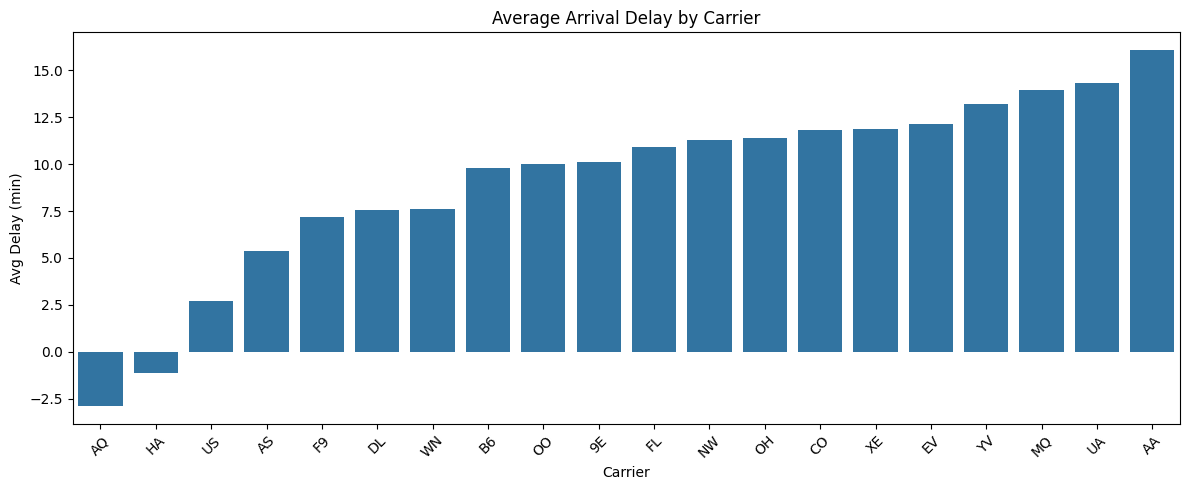

In [20]:
carrier_delay = flights_2008_df.groupby('carrier_code')['arrival_delay_min'].mean().sort_values()
carrier_delay = carrier_delay.reset_index().rename(columns={'arrival_delay_min': 'avg_arrival_delay'})

plt.figure(figsize=(12, 5))
sns.barplot(data=carrier_delay, x='carrier_code', y='avg_arrival_delay')
plt.title("Average Arrival Delay by Carrier")
plt.ylabel("Avg Delay (min)")
plt.xlabel("Carrier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We create a new route feature by combining origin and destination IATA codes. Then it lists the top 10 most frequent flight routes in the 2008 dataset, useful for identifying high-traffic connections.

In [21]:
flights_2008_df['route'] = flights_2008_df['origin_iata'] + " ➝ " + flights_2008_df['dest_iata']
route_counts = flights_2008_df['route'].value_counts().head(10)
print(route_counts)

route
SFO ➝ LAX    4686
LAX ➝ SFO    4557
OGG ➝ HNL    4321
HNL ➝ OGG    4198
LAX ➝ LAS    4142
LGA ➝ BOS    4066
BOS ➝ LGA    4060
LAS ➝ LAX    4054
LAS ➝ PHX    3910
DCA ➝ LGA    3865
Name: count, dtype: int64


In the next cell, we calculate and displays the percentage of flights that were cancelled in 2008 using the status column.

In [22]:
cancel_rate = flights_2008_df['status'].value_counts(normalize=True).get('cancelled', 0) * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

Cancellation Rate: 2.93%


Here, we visualize the number of flights for each day of the week. This helps identify trends in flight volume across weekdays and weekends.

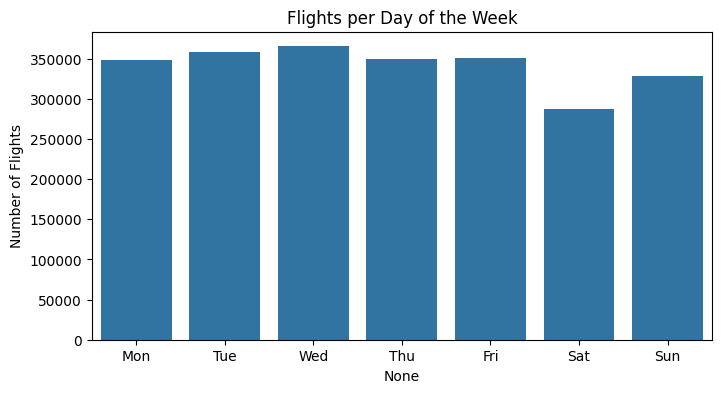

In [23]:
dow_counts = flights_2008_df['day_of_week'].value_counts().sort_index()
dow_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 4))
sns.barplot(x=dow_counts.index, y=dow_counts.values)
plt.title("Flights per Day of the Week")
plt.ylabel("Number of Flights")
plt.show()

Lastly, we export the final Gold Layer outputs—average delay by carrier and the top 10 flight routes—into CSV files for reporting, visualization, or downstream analysis.

In [24]:
carrier_delay.to_csv("gold_avg_delay_by_carrier.csv", index=False)
route_counts.to_csv("gold_top_routes.csv")

### **Conclusion**

This analysis of the 2008 U.S. domestic flight dataset uncovered several key insights into airline performance and operational patterns. By engineering features like `status`, `route`, and `day_of_week`, and integrating carrier and aircraft metadata, we were able to identify trends in on-time performance, average delays by airline, and high-traffic routes. Notably, the average on-time performance rate across all carriers stood at **73.53%**, and the overall **cancellation rate was 2.93%**. Among all carriers, **AirTran (FL)** and **Aloha Airlines (AQ)** reported the best average arrival delays, while **American Airlines (AA)** had the worst.

### **Recommendations**

1. **Carrier-Level Improvements:**

   * Airlines with high average delays (e.g., AA, UA) should investigate bottlenecks in operations, potentially adjusting turnaround times or hub schedules.
   * Best-performing carriers can be used as operational benchmarks.

2. **Route Optimization:**

   * High-traffic routes (e.g., **SFO → LAX**, **LAX → SFO**) could benefit from targeted punctuality initiatives or additional resource allocation during peak hours.

3. **Day-of-Week Insights:**

   * Fewer flights on weekends suggest less operational stress—airlines may trial performance-enhancing procedures during these periods before weekday rollout.

4. **Cancellation Monitoring:**

   * Although low, the cancellation rate may hide seasonal peaks; we recommend additional seasonal or weather-based analysis to anticipate surges.

5. **Extend Analysis:**

   * Enrich future iterations with weather data, airport congestion levels, and cost impacts of delays to derive business-critical intelligence.